# Question 1

Do  the basket analysis with Bread_Basket Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os



In [2]:
!pip install mlxtend

In [3]:
#For market Basket analysis import 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
os.chdir('C:\Datasets')
df = pd.read_csv('BreadBasket.csv')
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [5]:
#First observation, Shape of the data.
df.shape

(21293, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


# Checking missing Values

In [7]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [8]:
#Number of unique values in each variable
df.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

# Data Pre-processing

In [9]:
df[df["Item"]=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [10]:
df.drop(df[df['Item']=='NONE'].index,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [12]:
#Adding to the DataFrame
#Year
df["Year"] = df["Date"].apply(lambda x: x.split('-')[0])
#Month
df["Month"] = df["Date"].apply(lambda x: x.split('-')[1])
#Day 
df["Day"] = df["Date"].apply(lambda x: x.split('-')[2])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [14]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


In [15]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


# Exploring the Variables and Visualizing data

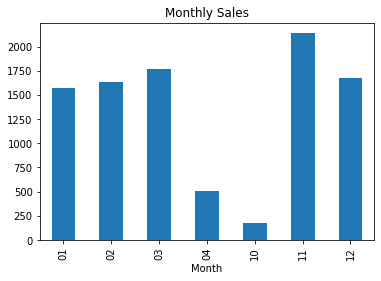

In [16]:
df.groupby('Month')["Transaction"].nunique().plot(kind="bar",title='Monthly Sales')
plt.show()

In [25]:
df = df.groupby(["Transaction","Item"]).size().reset_index(name='count')
basket= (df.groupby(["Transaction",'Item'])['count'].sum().unstack().reset_index().fillna(0).set_index("Transaction"))

#The encoding function
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_sets = basket.applymap(encode_units)

In [27]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [31]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
import mlxtend as ml

In [32]:
import pandas as pd
#Transactions
most_sold =df["Item"].value_counts().head(15)
print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           4528
Bread            3097
Tea              1350
Cake              983
Pastry            815
Sandwich          680
Medialuna         585
Hot chocolate     552
Cookies           515
Brownie           379
Farm House        371
Juice             365
Muffin            364
Alfajores         344
Scone             327
Name: Item, dtype: int64


In [33]:
transactions_list =[]
#for loop to create a list of the unique transactions throughout the dataset
for i in df["Transaction"].unique():
    tlist = list(set(df[df["Transaction"]==i]["Item"]))
    if len(tlist)>0:
        transactions_list.append(tlist)
print(len(transactions_list))

9465
